# Multiple Linear Regression
## Car Prices Prediction Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market and wanted to understand the factors on which the pricing of cars depends.

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [114]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [115]:
import numpy as np
import pandas as pd

In [116]:
CarPrice_df = pd.read_csv("CarPrice_Assignment.csv")
# Check the head of the dataset                          
CarPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the CarPrice_df dataframe

In [117]:
CarPrice_df.shape

(205, 26)

In [118]:
CarPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [119]:
CarPrice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Splitting column named 'CarName' _(which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model')_ into two columns 'car-company' and 'car-model' as per the model requirement**

In [120]:
# new data frame with split value columns 
new = CarPrice_df["CarName"].str.split(" ", n = 1, expand = True)

In [121]:
# making seperate car-company column from new data frame 
CarPrice_df["carCompany"]= new[0] 
  
# making seperate car-model column from new data frame 
CarPrice_df["carModel"]= new[1] 

In [122]:
CarPrice_df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'carCompany', 'carModel'],
      dtype=object)

In [123]:
CarPrice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany,carModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


Verify carCompany variable has unique and correct values

In [124]:
CarPrice_df["carCompany"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Based on observations following values in car-company variable needs to be updated:

- maxda       _to_      nissan
- Nissan      _to_       nissan
- porcshce    _to_       porsche
- toyouta     _to_      toyota
- vokswagen   _to_       volkswagen
- vw          _to_      volkswagen

In [125]:
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'maxda'),'carCompany'] = 'nissan'
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'Nissan'),'carCompany'] = 'nissan'
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'porcshce'),'carCompany'] = 'porsche'
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'toyouta'),'carCompany'] = 'toyota'
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'vokswagen'),'carCompany'] = 'volkswagen'
CarPrice_df.loc[(CarPrice_df['carCompany'] == 'vw'),'carCompany'] = 'volkswagen'

Re-verify carCompany variable has unique and correct values

In [126]:
CarPrice_df["carCompany"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'nissan', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [127]:
# dropping CarName variable/column of our dataframe.
CarPrice_df.drop(['CarName'], axis = 1, inplace = True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [128]:
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

%matplotlib inline

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

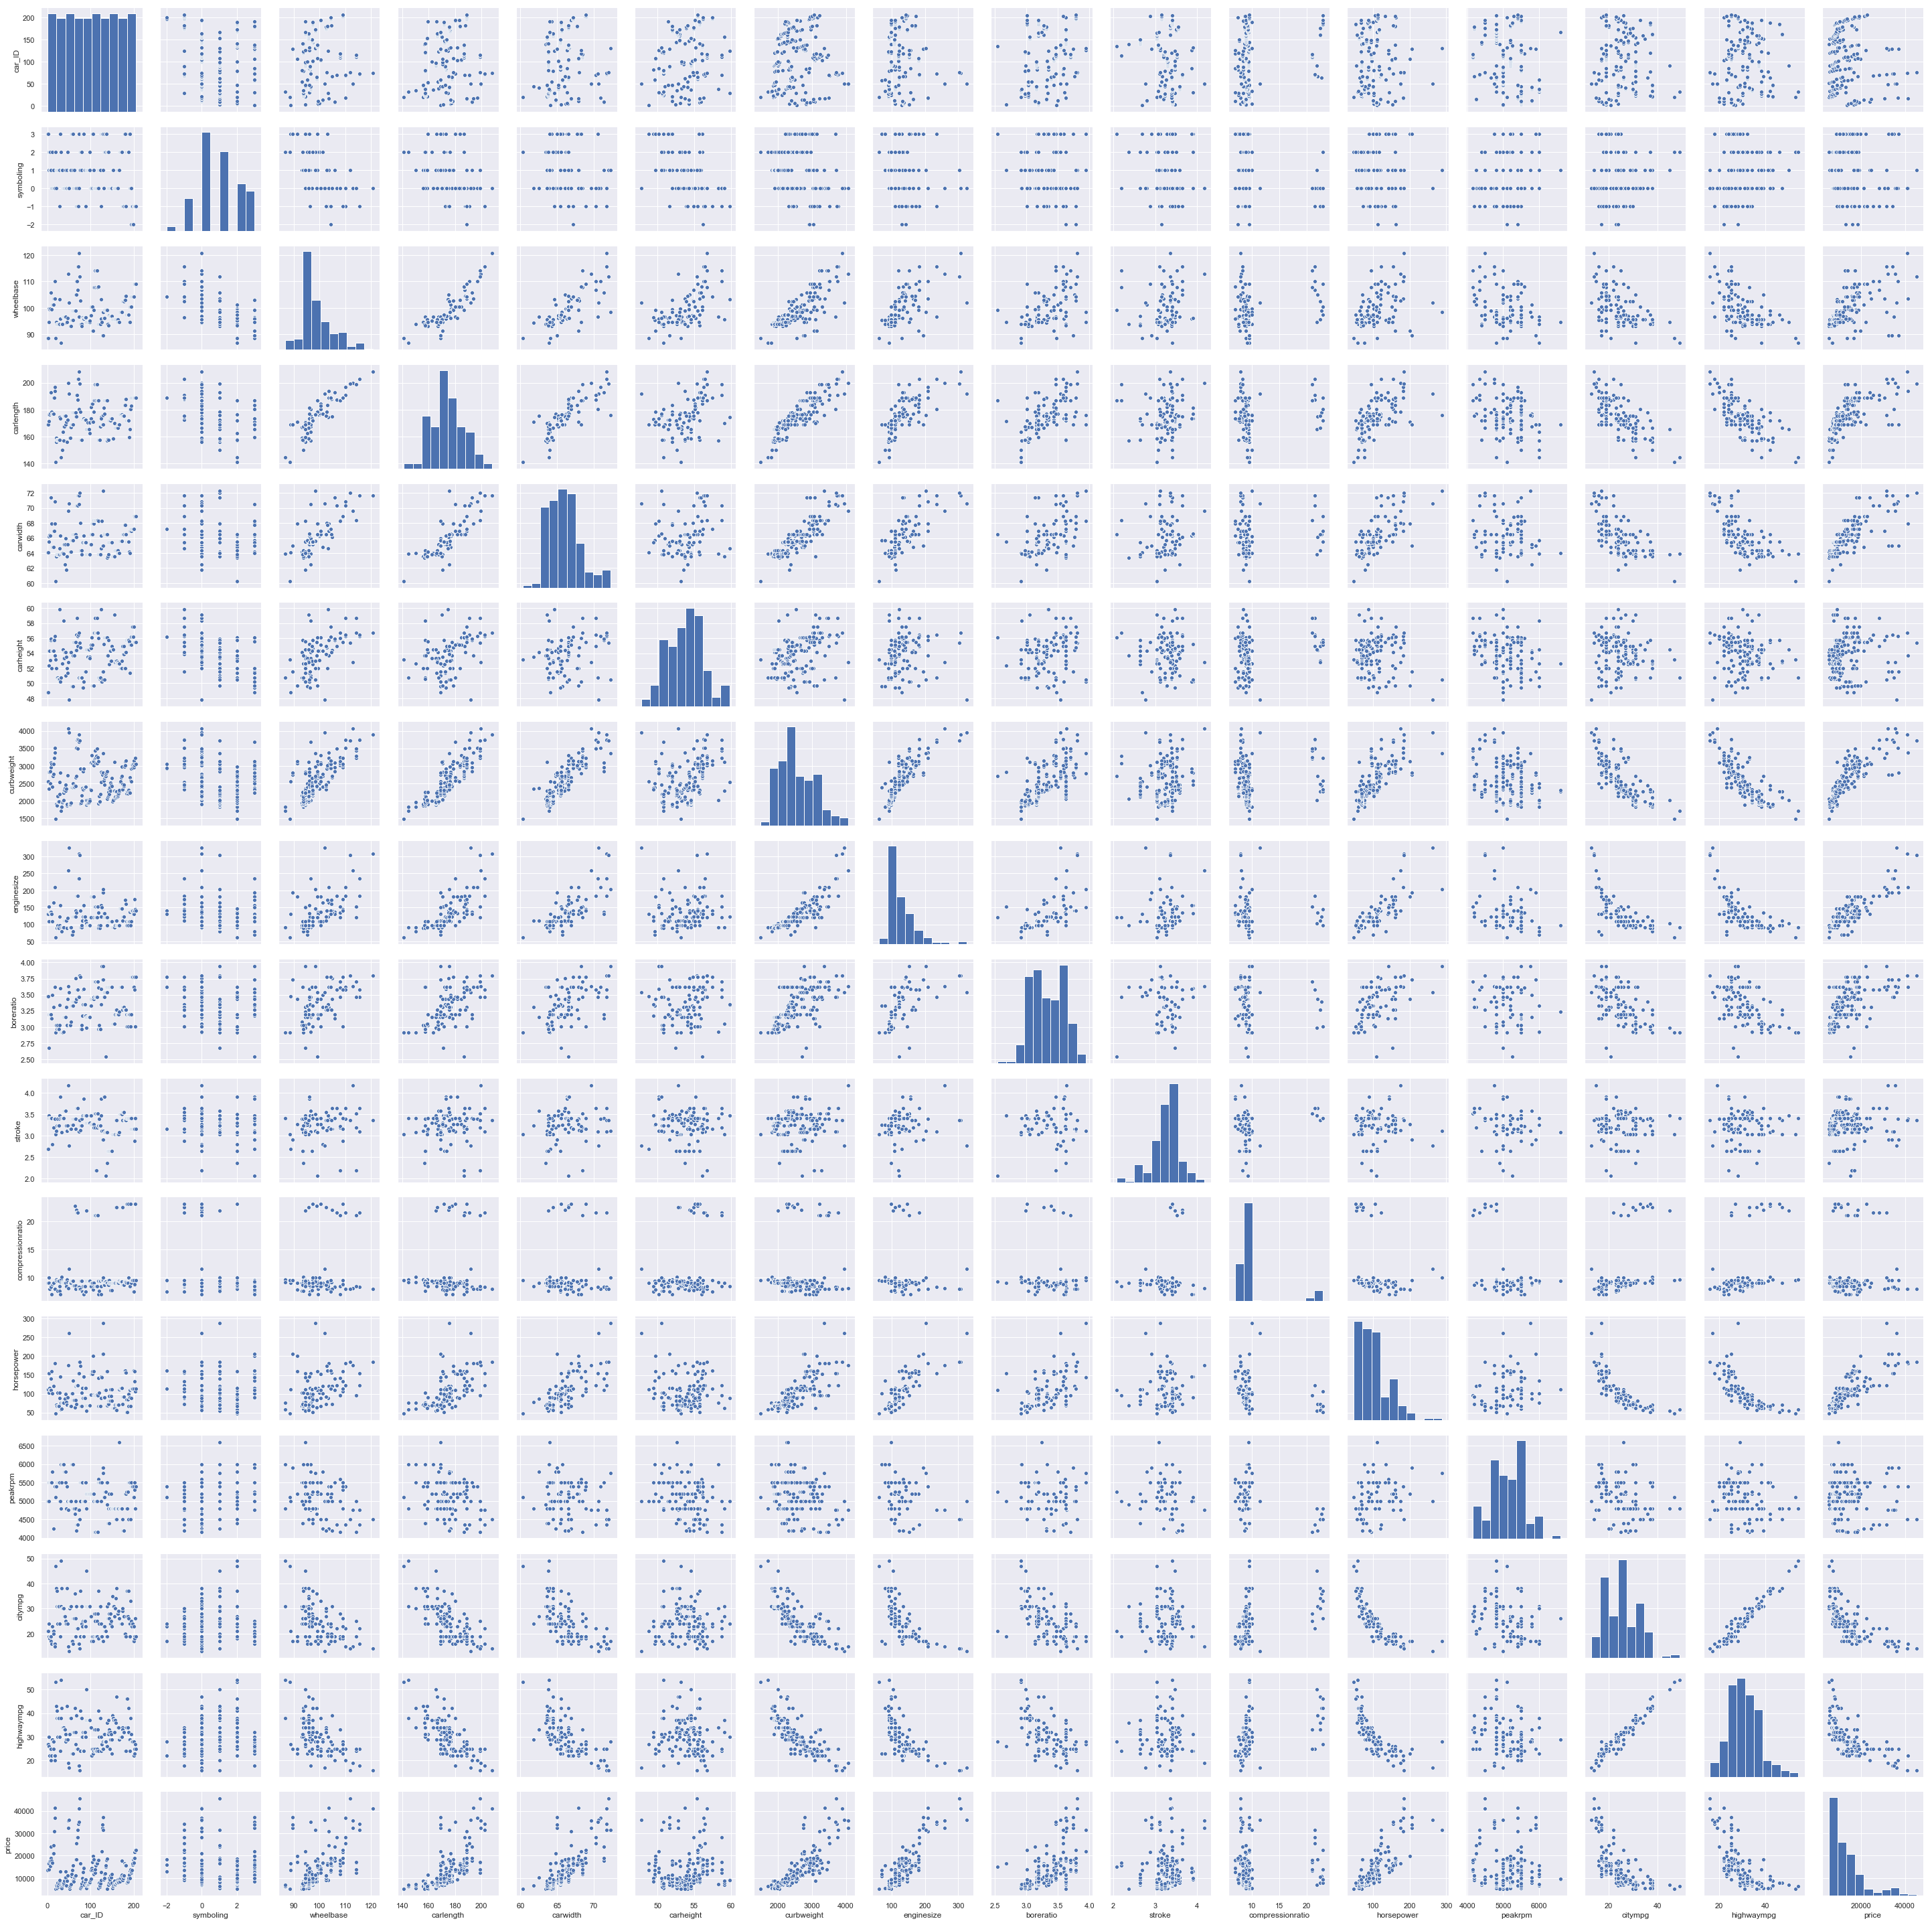

In [129]:
sns.pairplot(CarPrice_df)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

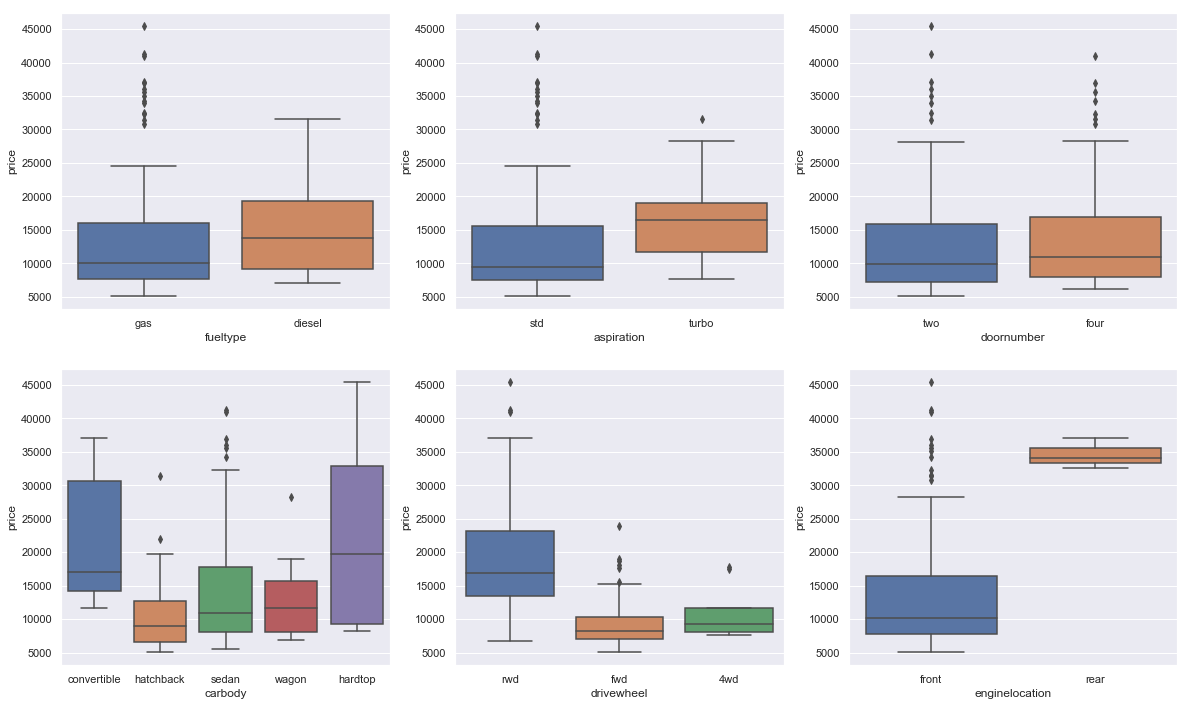

In [130]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice_df)
plt.show()

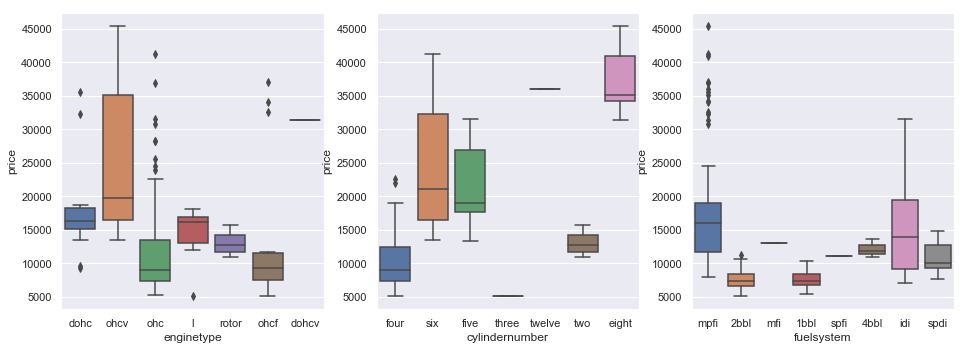

In [131]:
sns.set(rc={'figure.figsize':(16,12)})
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice_df)

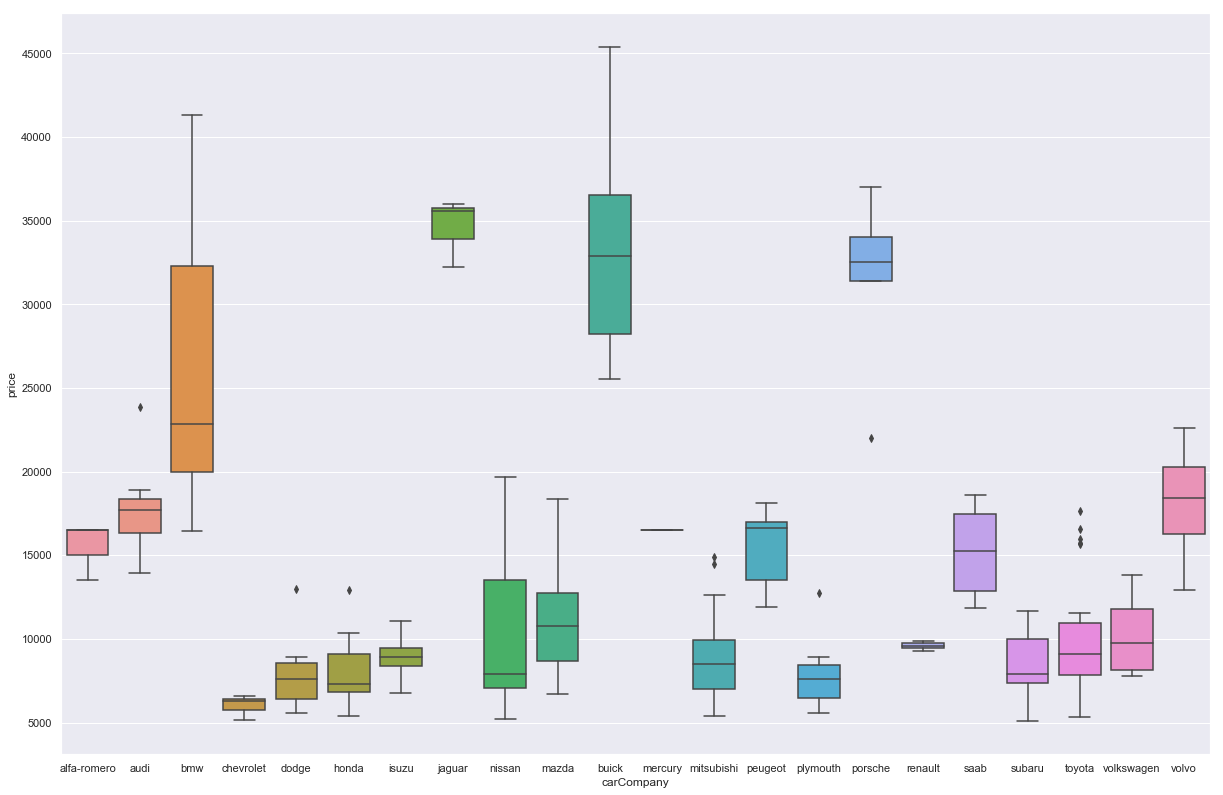

In [132]:
sns.set(rc={'figure.figsize':(70,30)})
plt.subplot(2,3,1)
sns.boxplot(x = 'carCompany', y = 'price', data = CarPrice_df)
plt.show()

## Step 3: Data Preparation

You can see that your dataset has many columns with binary values like fueltype, aspiration, doornumber, and enginelocation

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

- Fixing fueltype variable to represent 'gas' as 1 and 'diesel' as 0

- Fixing aspiration variable to represent 'std' as 1 and 'turbo' as 0

- Fixing doornumber variable to represent 'two' as 1 and 'four' as 0

- Fixing enginelocation variable to represent 'front' as 1 and 'rear' as 0

In [133]:
CarPrice_df['fueltype'] = CarPrice_df['fueltype'].map({'gas': 1, 'diesel': 0})
CarPrice_df['aspiration'] = CarPrice_df['aspiration'].map({'std': 1, 'turbo': 0})
CarPrice_df['doornumber'] = CarPrice_df['doornumber'].map({'two': 1, 'four': 0})
CarPrice_df['enginelocation'] = CarPrice_df['enginelocation'].map({'front': 1, 'rear': 0})

In [134]:
# Check the CarPrice_df dataframe now
CarPrice_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany,carModel
0,1,3,1,1,1,convertible,rwd,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,1,1,1,convertible,rwd,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,1,1,1,hatchback,rwd,1,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,1,1,0,sedan,fwd,1,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,1,1,0,sedan,4wd,1,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


### Dummy Variables

The variable `drivewheel` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [135]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel_df'
drivewheel_df = pd.get_dummies(CarPrice_df['drivewheel'])

In [136]:
# Check what the dataset 'drivewheel_df' looks like
drivewheel_df.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [137]:
# Add the results to the original CarPrice_df dataframe
CarPrice_df = pd.concat([CarPrice_df, drivewheel_df], axis = 1)

In [138]:
# Now let's see the head of our dataframe.
CarPrice_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carCompany,carModel,4wd,fwd,rwd
0,1,3,1,1,1,convertible,rwd,1,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,giulia,0,0,1
1,2,3,1,1,1,convertible,rwd,1,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0,1
2,3,1,1,1,1,hatchback,rwd,1,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,0,1
3,4,2,1,1,0,sedan,fwd,1,99.8,176.6,...,102,5500,24,30,13950.0,audi,100 ls,0,1,0
4,5,2,1,1,0,sedan,4wd,1,99.4,176.6,...,115,5500,18,22,17450.0,audi,100ls,1,0,0


Now, you don't need three columns. You can drop the `rwd` column, as the type of drivewheel can be identified with just the first two columns where — 
- `00` will correspond to `rwd`
- `01` will correspond to `fwd`
- `10` will correspond to `4wd`

In [139]:
CarPrice_df.drop(['rwd'], axis=1, inplace = True)

In [140]:
# Drop 'drivewheel' as we have created the dummies for it
CarPrice_df.drop(['drivewheel'], axis = 1, inplace = True)

In [141]:
CarPrice_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany,carModel,4wd,fwd
0,1,3,1,1,1,convertible,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,0,0
1,2,3,1,1,1,convertible,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,0,0
2,3,1,1,1,1,hatchback,1,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,0,0
3,4,2,1,1,0,sedan,1,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,audi,100 ls,0,1
4,5,2,1,1,0,sedan,1,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,audi,100ls,1,0


In [142]:
# Get the dummy variable for the feature carCompany,cylindernumber, carbody,enginetype and fuelsystem
dummies_df = pd.get_dummies(CarPrice_df[['carCompany','cylindernumber','carbody','enginetype','fuelsystem']])

In [143]:
# Check what the dataset 'carCompany_df' looks like
dummies_df.head()

,carCompany_alfa-romero,carCompany_audi,carCompany_bmw,carCompany_buick,carCompany_chevrolet,carCompany_dodge,carCompany_honda,carCompany_isuzu,carCompany_jaguar,carCompany_mazda,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
# Add the results to the original CarPrice_df dataframe
CarPrice_df = pd.concat([CarPrice_df, dummies_df], axis = 1)

In [145]:
# Now let's see the head of our dataframe.
CarPrice_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,convertible,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,convertible,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,hatchback,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,sedan,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,sedan,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [146]:
#The variable `car-company, carbody,enginetype and fuelsystem` is difficult to convert via `dummy variables`. Therefore, using `LabelEncoder` from `sklearn` in same place and storing the dataset as `CarPrice_df_final` which will be used for training and testing.

In [147]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline

In [148]:
#class MultiColumnLabelEncoder:
#   def __init__(self,columns = None):
#       self.columns = columns # array of column names to encode

#    def fit(self,X,y=None):
#        return self # not relevant here

#    def transform(self,X):
#       '''
#        Transforms columns of X specified in self.columns using
#        LabelEncoder(). If no columns specified, transforms all
#        columns in X.
#        '''
#       output = X.copy()
#        if self.columns is not None:
#            for col in self.columns:
#                output[col] = LabelEncoder().fit_transform(output[col])
#        else:
#            for colname,col in output.iteritems():
#                output[colname] = LabelEncoder().fit_transform(col)
#        return output

#    def fit_transform(self,X,y=None):
#        return self.fit(X,y).transform(X)

In [149]:
#CarPrice_df_final = MultiColumnLabelEncoder(columns = ['car-company','carbody','enginetype','fuelsystem']).fit_transform(CarPrice_df)

In [150]:
CarPrice_df_final = CarPrice_df
CarPrice_df_final.drop(['car_ID','carModel','carCompany','cylindernumber','carbody','enginetype','fuelsystem'], axis=1, inplace = True)
CarPrice_df_final.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [151]:
CarPrice_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
symboling                 205 non-null int64
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
4wd                     

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [152]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
CarPrice_df_train, CarPrice_df_test = train_test_split(CarPrice_df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
# Apply scaler() to all the columns except the 'binary','dummy' and 'categorical' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_df_train[num_vars] = scaler.fit_transform(CarPrice_df_train[num_vars])

In [156]:
CarPrice_df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [157]:
CarPrice_df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.062937,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.243703,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


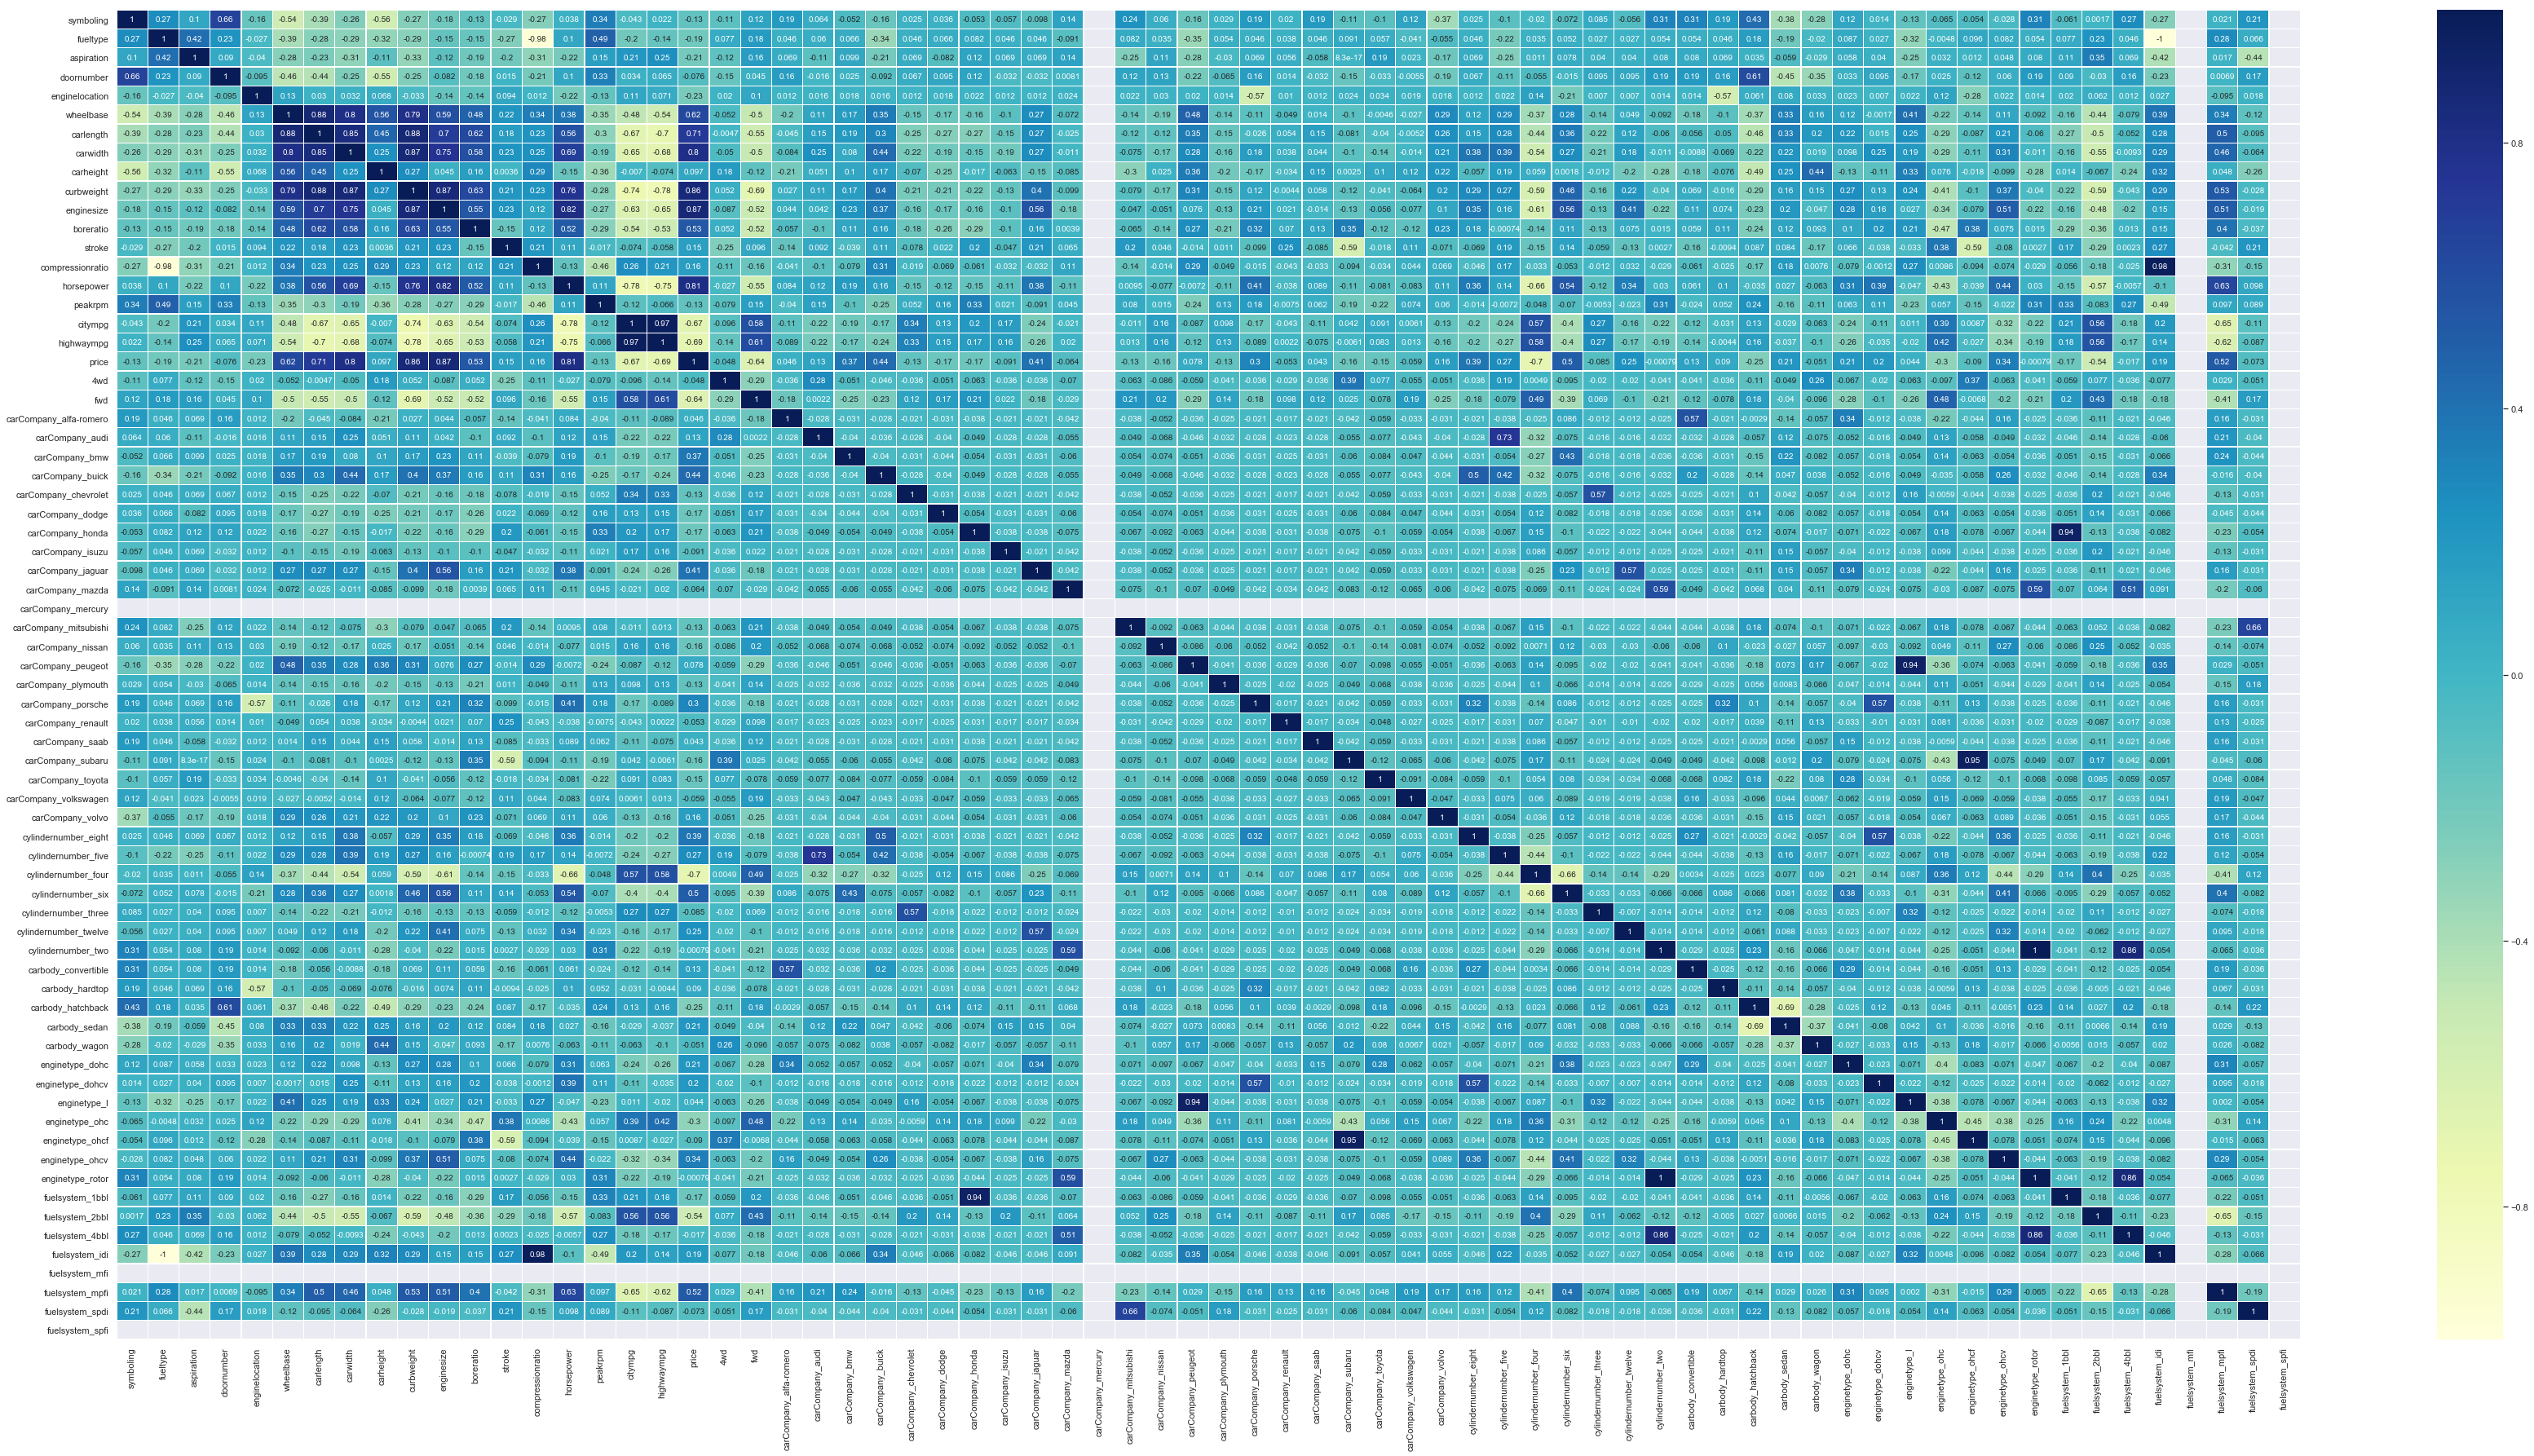

In [158]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (60, 30))
sns.heatmap(CarPrice_df_train.corr(), annot = True, annot_kws={"size": 10}, cmap="YlGnBu", linewidths=.3)
plt.show()

As you might have noticed, `enginesize` seems to correlate to `price` the most. Let's see a pairplot for `enginesize` vs `price`.

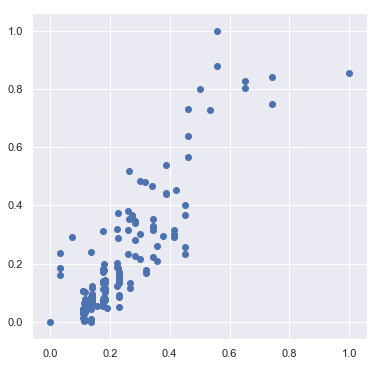

In [159]:
plt.figure(figsize=[6,6])
plt.scatter(CarPrice_df_train.enginesize, CarPrice_df_train.price)
plt.show()

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [160]:
y_train = CarPrice_df_train.pop('price')
X_train = CarPrice_df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [161]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [162]:
# Check the parameters obtained
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

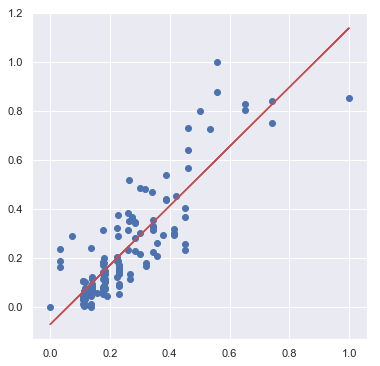

In [163]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1],- 0.072 + 1.210*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [164]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        01:06:33   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `curbweight`.

In [165]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [166]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [167]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.31e-50
Time:                        01:06:34   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.752` from `0.799`.
Let's go ahead and add another variable, `horsepower`.

In [168]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','horsepower']]

In [169]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [170]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.16e-51
Time:                        01:06:34   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [171]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','horsepower']]

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables. For all feature variables, we will use RFE and LinearRegression as it will reduce the effort of manually checking and eliminating variables from model.

In [172]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False  True False False  True False  True  True  True
  True False False False False False False False False False  True False
 False False False False False False False False False  True False  True
 False False False False False False  True False False  True  True  True
  True False False False False False False False False False False False
  True False False False False False False False False]
[52 12  6 51  1  2 32  1 18  1  1  1  1 14 26  5 53  4 50 45 49 34  1 33
 31 19 30 41 27 42 44 17 48  1 20  1 38 15 28 46 47 23  1 24 16  1  1  1
  1  3 39 37 40 43 22 36 35 25 29 21  1 11  9  8 13 54 10  7 55]


In [173]:
X_train.columns[rfe.support_]

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'carCompany_bmw', 'carCompany_peugeot', 'carCompany_porsche',
       'cylindernumber_eight', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginetype_rotor'],
      dtype='object')

In [174]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', '4wd', 'fwd', 'carCompany_alfa-romero',
       'carCompany_audi', 'carCompany_buick', 'carCompany_chevrolet',
       'carCompany_dodge', 'carCompany_honda', 'carCompany_isuzu',
       'carCompany_jaguar', 'carCompany_mazda', 'carCompany_mercury',
       'carCompany_mitsubishi', 'carCompany_nissan', 'carCompany_plymouth',
       'carCompany_renault', 'carCompany_saab', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'carCompany_volvo',
       'cylindernumber_five', 'cylindernumber_four', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
      

In [175]:
print("Before droping of columns")
print(X_train.columns)
X_train1 = X_train.drop(col,1)
print("After Droping of columns")
print(X_train1.columns)

Before droping of columns
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'carCompany_alfa-romero', 'carCompany_audi', 'carCompany_bmw',
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercury', 'carCompany_mitsubishi',
       'carCompany_nissan', 'carCompany_peugeot', 'carCompany_plymouth',
       'carCompany_porsche', 'carCompany_renault', 'carCompany_saab',
       'carCompany_subaru', 'carCompany_toyota', 'carCompany_volkswagen',
       'carCompany_volvo', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylind

In [176]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train1)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.280732
enginelocation          -0.342126
carwidth                 0.282859
curbweight               0.371707
enginesize               1.070156
boreratio               -0.277072
stroke                  -0.211877
carCompany_bmw           0.276018
carCompany_peugeot      -0.089072
carCompany_porsche       0.165286
cylindernumber_eight    -0.128858
cylindernumber_six      -0.168974
cylindernumber_three     0.202769
cylindernumber_twelve   -0.503260
cylindernumber_two       0.114876
enginetype_rotor         0.114876
dtype: float64

In [177]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           9.86e-70
Time:                        01:06:34   Log-Likelihood:                 214.92
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     128   BIC:                            -355.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [178]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,cylindernumber_two,inf
14,enginetype_rotor,inf
3,enginesize,106.560000
2,curbweight,57.340000
1,carwidth,39.270000
0,enginelocation,39.160000
5,stroke,34.690000
4,boreratio,31.810000
10,cylindernumber_six,6.480000
12,cylindernumber_twelve,5.050000


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

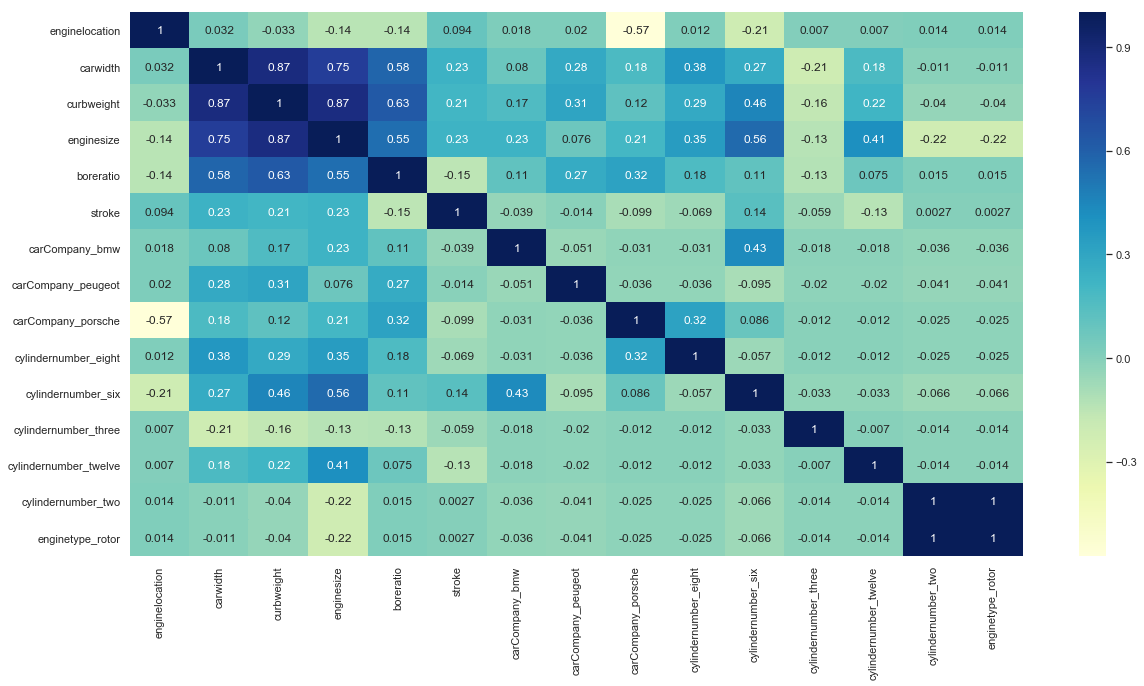

In [180]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train1.corr(),annot = True, cmap="YlGnBu")

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. As we can see from heat map the `cylindernumber_two` and `enginetype_rotor` are highly corelated, the corelation is 1 and also the VIF value is pretty high for `enginetype_rotor`. It is `infinity` therefore let's go ahead and drop this variable

In [181]:
# Dropping highly correlated variables and insignificant variables

X = X_train1.drop('enginetype_rotor', 1)

In [182]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [183]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           9.86e-70
Time:                        01:06:36   Log-Likelihood:                 214.92
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     128   BIC:                            -355.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [184]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,106.56
2,curbweight,57.34
1,carwidth,39.27
0,enginelocation,39.16
5,stroke,34.69
4,boreratio,31.81
10,cylindernumber_six,6.48
12,cylindernumber_twelve,5.05
9,cylindernumber_eight,3.46
13,cylindernumber_two,2.05


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `cylindernumber_eight` has a significant VIF (`3.46`) and a high p-value (`0.039`) as well. Hence, this variable isn't of much use and should be dropped.

In [185]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('cylindernumber_eight', 1)

In [186]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [187]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.73e-70
Time:                        01:06:36   Log-Likelihood:                 212.53
No. Observations:                 143   AIC:                            -397.1
Df Residuals:                     129   BIC:                            -355.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [188]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,52.92
3,enginesize,49.98
1,carwidth,39.04
0,enginelocation,29.80
5,stroke,19.53
4,boreratio,18.38
9,cylindernumber_six,3.26
11,cylindernumber_twelve,2.49
7,carCompany_peugeot,1.57
12,cylindernumber_two,1.54


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `curbweight` has a significant VIF (`52.92`). Hence, this variable isn't of much use and should be dropped.

In [189]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('curbweight', 1)

In [190]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [191]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.81e-65
Time:                        01:06:36   Log-Likelihood:                 197.60
No. Observations:                 143   AIC:                            -369.2
Df Residuals:                     130   BIC:                            -330.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [192]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,34.73
0,enginelocation,29.79
1,carwidth,28.42
4,stroke,19.31
3,boreratio,18.05
8,cylindernumber_six,3.24
10,cylindernumber_twelve,2.34
11,cylindernumber_two,1.42
5,carCompany_bmw,1.33
6,carCompany_peugeot,1.33


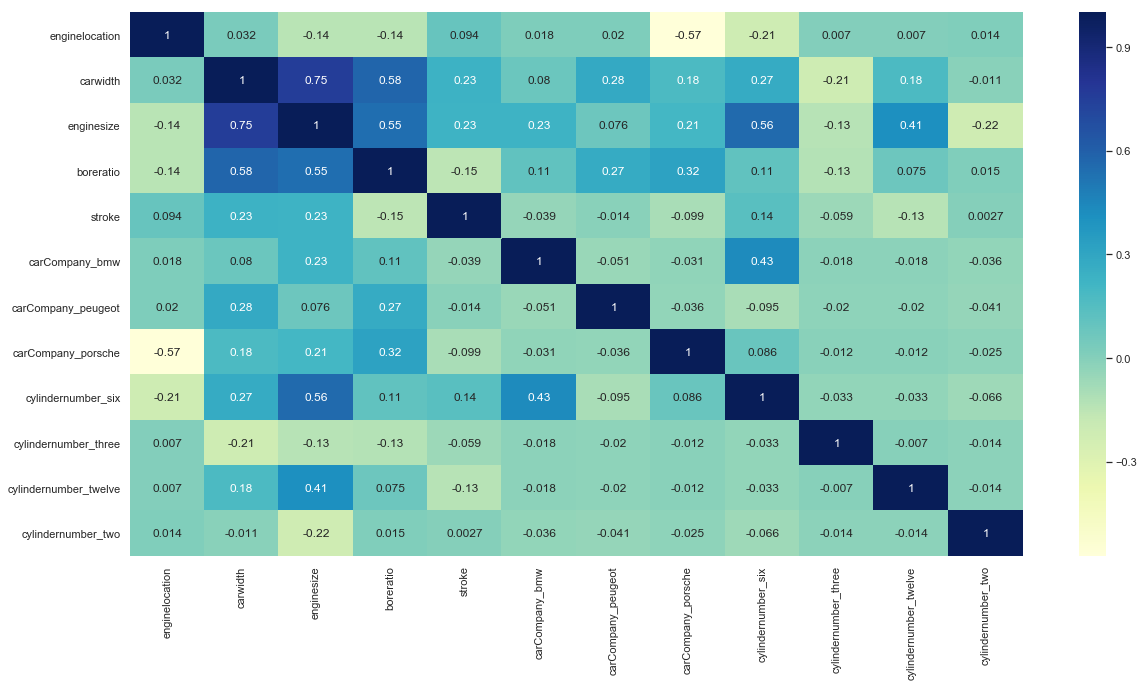

In [193]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True, cmap="YlGnBu")

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `carCompany_porsche` has a high p-value (`0.186`). Hence, this variable isn't of much use and should be dropped.

In [194]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('carCompany_porsche', 1)

In [195]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [196]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     135.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           7.65e-66
Time:                        01:06:38   Log-Likelihood:                 196.63
No. Observations:                 143   AIC:                            -369.3
Df Residuals:                     131   BIC:                            -333.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

In [197]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,34.65
1,carwidth,28.25
0,enginelocation,27.49
4,stroke,19.20
3,boreratio,16.33
7,cylindernumber_six,3.24
9,cylindernumber_twelve,2.34
10,cylindernumber_two,1.41
5,carCompany_bmw,1.32
6,carCompany_peugeot,1.29


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `stroke` has a significant VIF (`19.20`). Hence, this variable isn't of much use and should be dropped.

In [198]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('stroke', 1)

In [199]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [200]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           9.04e-64
Time:                        01:06:38   Log-Likelihood:                 188.68
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     132   BIC:                            -322.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [201]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,28.18
2,enginesize,27.81
3,boreratio,12.80
0,enginelocation,10.17
6,cylindernumber_six,3.07
8,cylindernumber_twelve,1.87
9,cylindernumber_two,1.33
4,carCompany_bmw,1.31
5,carCompany_peugeot,1.29
7,cylindernumber_three,1.06


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `cylindernumber_six` has a significant VIF (`3.07`) . Hence, this variable isn't of much use and should be dropped.

In [202]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('cylindernumber_six', 1)

In [203]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [204]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     137.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           7.56e-63
Time:                        01:06:38   Log-Likelihood:                 183.65
No. Observations:                 143   AIC:                            -347.3
Df Residuals:                     133   BIC:                            -317.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [205]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,25.45
2,enginesize,14.84
3,boreratio,11.19
0,enginelocation,10.12
7,cylindernumber_twelve,1.39
5,carCompany_peugeot,1.29
8,cylindernumber_two,1.23
4,carCompany_bmw,1.17
6,cylindernumber_three,1.06


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `boreratio` has a significant VIF (`11.19`) and a high p-value (`0.235`) as well. Hence, this variable isn't of much use and should be dropped.

In [206]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('boreratio', 1)

In [207]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [208]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.19e-63
Time:                        01:06:38   Log-Likelihood:                 182.89
No. Observations:                 143   AIC:                            -347.8
Df Residuals:                     134   BIC:                            -321.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [209]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,24.90
2,enginesize,13.42
0,enginelocation,8.38
6,cylindernumber_twelve,1.34
4,carCompany_peugeot,1.23
7,cylindernumber_two,1.20
3,carCompany_bmw,1.17
5,cylindernumber_three,1.06


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `cylindernumber_twelve` has a shigh p-value (`0.185`) as well. Hence, this variable isn't of much use and should be dropped.

In [210]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('cylindernumber_twelve', 1)

In [211]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [212]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.09e-64
Time:                        01:06:38   Log-Likelihood:                 181.94
No. Observations:                 143   AIC:                            -347.9
Df Residuals:                     135   BIC:                            -324.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2481 

In [213]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.96
2,enginesize,10.48
0,enginelocation,8.38
4,carCompany_peugeot,1.23
6,cylindernumber_two,1.17
3,carCompany_bmw,1.13
5,cylindernumber_three,1.06


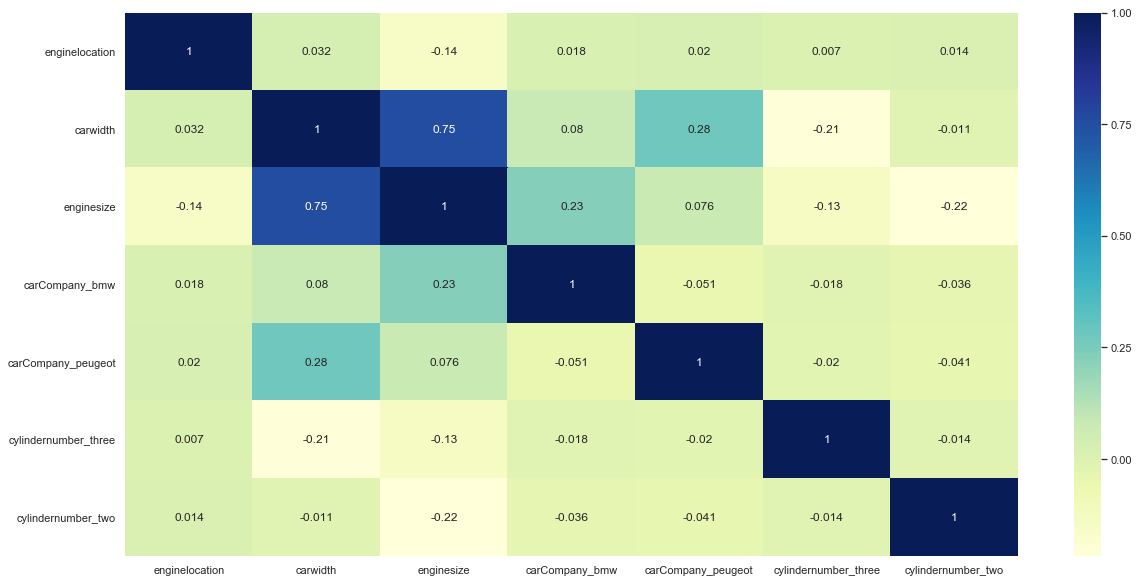

In [214]:
plt.figure(figsize = (20,10))  
sns.heatmap(X.corr(),annot = True, cmap="YlGnBu")

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `cylindernumber_three` has a high p-value (`0.005`) and negative correlation with car width and einginesize as well. Hence, this variable isn't of much use and should be dropped.

In [215]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('cylindernumber_three', 1)

In [216]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [217]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.00e-64
Time:                        01:06:39   Log-Likelihood:                 177.67
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     136   BIC:                            -320.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2535      0

In [218]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.24
2,enginesize,10.44
0,enginelocation,7.91
4,carCompany_peugeot,1.23
5,cylindernumber_two,1.17
3,carCompany_bmw,1.13


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `carCompany_peugeot` has a high p-value (`0.045`) as well. Hence, this variable isn't of much use and should be dropped.

In [219]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('carCompany_peugeot', 1)

In [220]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [221]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.81e-64
Time:                        01:07:22   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2530      0

In [222]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,19.43
2,enginesize,9.83
0,enginelocation,7.53
4,cylindernumber_two,1.15
3,carCompany_bmw,1.13


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `carwidth` has a significant VIF (`19.43`). Hence, this variable isn't of much use and should be dropped.

In [223]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('carwidth', 1)

In [224]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [225]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.27e-52
Time:                        01:08:08   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2024      0

In [226]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.61
0,enginelocation,3.54
2,carCompany_bmw,1.10
3,cylindernumber_two,1.08


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [227]:
y_train_price = lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

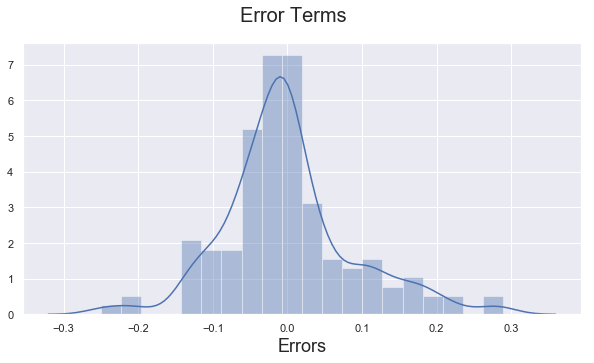

In [230]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10,5))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. twelfth model.

#### Applying the scaling on the test sets

In [231]:
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_df_test[num_vars] = scaler.transform(CarPrice_df_test[num_vars])

In [232]:
CarPrice_df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.064516,0.0,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.247676,0.0,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.0,0.000000,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [233]:
y_test = CarPrice_df_test.pop('price')
X_test = CarPrice_df_test

In [239]:
# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test)

In [240]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12

X_test_m12 = X_test_m12.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
        'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'carCompany_alfa-romero', 'carCompany_audi', 
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_dodge',
       'carCompany_honda', 'carCompany_isuzu', 'carCompany_jaguar',
       'carCompany_mazda', 'carCompany_mercury', 'carCompany_mitsubishi',
       'carCompany_nissan', 'carCompany_peugeot', 'carCompany_plymouth',
       'carCompany_porsche', 'carCompany_renault', 'carCompany_saab',
       'carCompany_subaru', 'carCompany_toyota', 'carCompany_volkswagen',
       'carCompany_volvo', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'], axis = 1)

In [241]:
# Making predictions using the fourth model

y_pred_m12 = lr_12.predict(X_test_m12)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

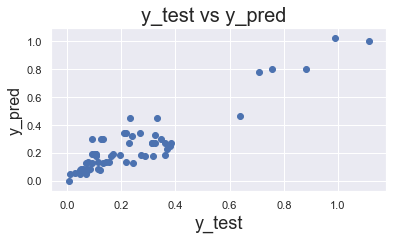

In [247]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize = (6,3))
plt.scatter(y_test, y_pred_m12)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Index')

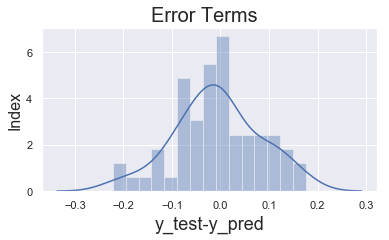

In [248]:
# Plotting the error terms to understand the distribution.
fig = plt.figure(figsize = (6,3))
sns.distplot((y_test-y_pred_m12),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)

We can see that the equation of our best fitted line is:

$ price = 1.188  \times  enginesize + 0.198  \times  carCompany(bmw) + 0.251 \times cylindernumber(two) - 0.287 \times enginelocation $

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model